In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [34]:
df_cper = pd.read_csv('/project/cper_neon_aop/cper_hls_veg_models/data/training/vor_2013_2022_cln_2023_08_29_plot_hls_idxs.csv')
df_tb = pd.read_csv('/project/cper_neon_aop/tbng_veg/data/bm_extract/TB_all_bm_veg_idx_20231218.csv')
df_gb = pd.read_csv('../data/extractions/herb-biomass-gb-ltar_hls.csv')
df_arch = pd.read_csv('../data/extractions/ltar_arch_biomass_hls.csv')
df_reno = pd.read_csv('../data/extractions/ltar_reno_biomass_hls.csv')

In [35]:
var_names = [
    'NDVI', 'DFI', 'NDTI', 'SATVI', 'NDII7', 'SAVI',
    'RDVI', 'MTVI1', 'NCI', 'NDCI', 'PSRI', 'NDWI', 'EVI', 'TCBI', 'TCGI', 'TCWI',
    'BAI_126', 'BAI_136', 'BAI_146', 'BAI_236', 'BAI_246', 'BAI_346',
    'BLUE', 'GREEN', 'RED', 'NIR1', 'SWIR1', 'SWIR2'
]

In [36]:
df_cper['Site'] = 'CPER'
df_tb['Site'] = 'TB'
df_gb['Site'] = 'GB'
df_arch['Site'] = 'ARCH'
df_reno['Site'] = 'RENO'

In [37]:
df_cper = df_cper[['Site', 'Id', 'Pasture', 'Date_mean', 'Biomass_kg_ha'] + var_names].rename(
    columns={'Id': 'ID',
             'Date_mean': 'Date'}
)

In [38]:
df_tb = df_tb[['Site', 'ID', 'Date', 'bm_gm2'] + var_names].rename(
    columns={'bm_gm2': 'Biomass_kg_ha'})
df_tb['Biomass_kg_ha'] = df_tb['Biomass_kg_ha'] * 10

In [39]:
df_gb = df_gb[['Site', 'id', 'date_median', 'pasture', 'herb_kg_ha'] + var_names].rename(
    columns={'date_median': 'Date',
             'id': 'ID',
             'pasture': 'Pasture',
             'herb_kg_ha': 'Biomass_kg_ha'}
)
df_gb['Biomass_kg_ha'] = df_gb['Biomass_kg_ha'] * 10.0

In [40]:
df_arch = df_arch[['Site', 'ID', 'Pasture', 'Date', 'Biomass_kg_ha', 'Treatment'] + var_names]
df_arch.loc[df_arch['Biomass_kg_ha'] == 0.0] = np.nan

In [41]:
df_reno = df_reno.groupby(['Site', 'Pasture', 'Date']).mean().reset_index()
df_reno['ID'] = df_reno['Pasture']

In [42]:
df_reno = df_reno[['Site', 'ID', 'Pasture', 'Date', 'DW kg/ha'] + var_names].rename(
    columns={'DW kg/ha': 'Biomass_kg_ha'}
)

In [43]:
df = pd.concat([df_cper, df_tb, df_gb, df_arch, df_reno])

In [44]:
df['log_Biomass_kg_ha'] = np.log(1 + df['Biomass_kg_ha'])

In [45]:
x_var = 'SWIR2'

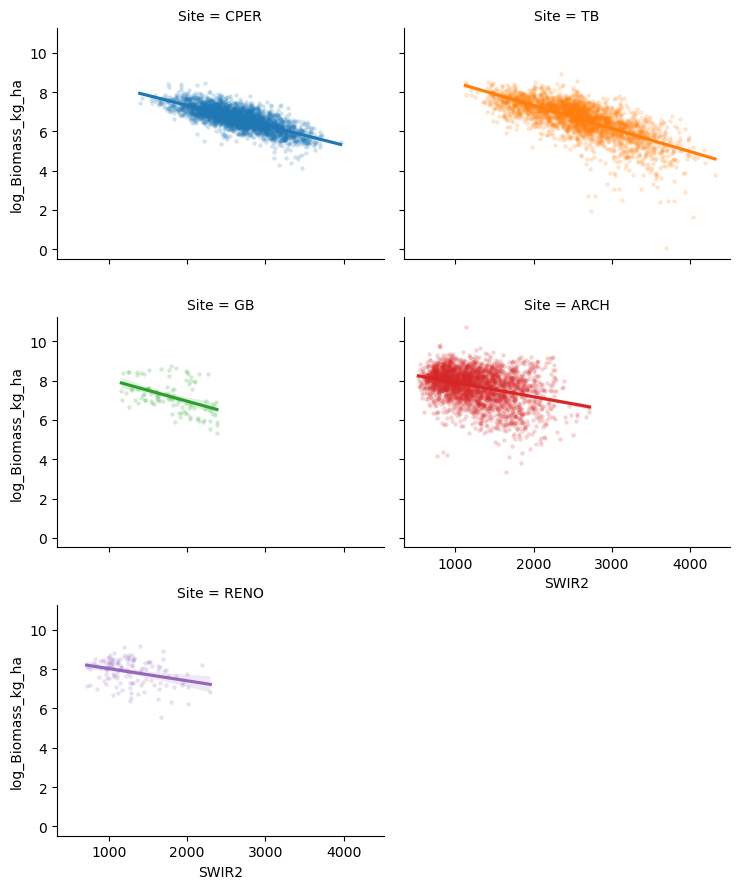

In [46]:
sns.lmplot(x=x_var, y='log_Biomass_kg_ha', data=df, 
           col='Site', hue='Site', col_wrap=2,
           height=3, aspect=1.25,
           scatter_kws={'alpha': 0.2,
                        's': 10,
                        'linewidth': 0})

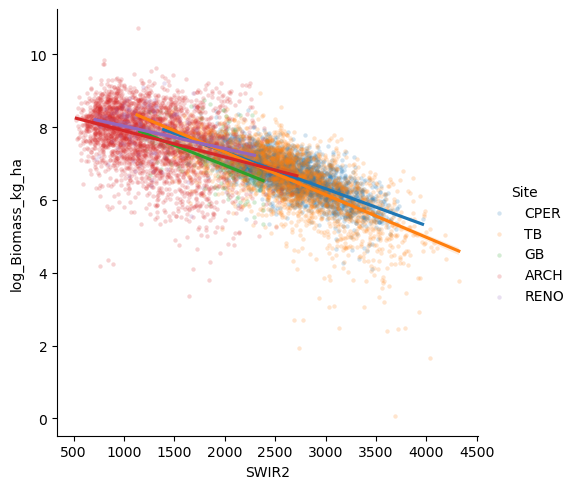

In [47]:
sns.lmplot(x=x_var, y='log_Biomass_kg_ha', data=df, hue='Site',
           scatter_kws={'alpha': 0.2,
                        's': 10,
                        'linewidth': 0})

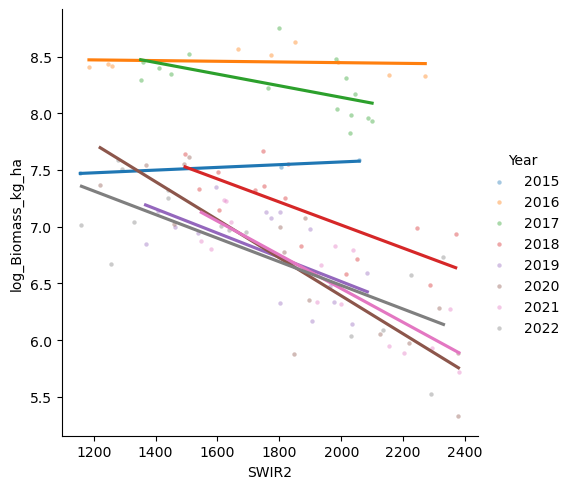

In [54]:
x_var='SWIR2'
df_sub = df[df['Site'] == 'GB'].copy()#.groupby(['Pasture', 'Date']).mean().reset_index()
df_sub['Date'] = pd.to_datetime(df_sub['Date'])
df_sub['Year'] = df_sub['Date'].dt.year
df_sub['Month'] = df_sub['Date'].dt.month
p = sns.lmplot(x=x_var, y='log_Biomass_kg_ha', data=df_sub, hue='Year', ci=None,
           scatter_kws={'alpha': 0.4,
                        's': 10,
                        'linewidth': 0})
#sns.scatterplot(x=x_var, y='log_Biomass_kg_ha', data=df,
#                alpha=0.2,
#                c='grey', 
#                s=10,
#                linewidth=0,
#                ax=p.axes.flatten()[0])

In [47]:
df_sub[(df_sub['ID'] == 7.0)].sort_values('Date')

,Site,ID,Pasture,Date,Biomass_kg_ha,NDVI,DFI,NDTI,SATVI,NDII7,...,BAI_346,BLUE,GREEN,RED,NIR1,SWIR1,SWIR2,log_Biomass_kg_ha,Year,Month
4,ARCH,7.0,N,2020-03-25,2060.0,0.772006,6.557032,0.341248,0.301590,0.501336,...,83.311249,331.024626,604.840334,430.425686,3352.384039,2261.792722,1111.751469,7.630947,2020,3
3,ARCH,7.0,N,2020-06-11,3288.0,0.750332,7.125628,0.353991,0.291717,0.523321,...,79.154083,324.619136,705.702077,502.474012,3906.616183,2319.537529,1129.942590,8.098339,2020,6
2,ARCH,7.0,N,2020-08-13,2372.0,0.829906,5.440175,0.415303,0.312336,0.671714,...,64.447837,295.495085,811.187776,453.101583,4877.203491,2321.489353,960.675380,7.771910,2020,8
1,ARCH,7.0,N,2020-10-15,2808.0,0.749621,7.309873,0.345620,0.282029,0.503467,...,85.081075,271.883144,609.588888,461.834721,3259.310860,2165.008723,1048.443313,7.940584,2020,10
0,ARCH,7.0,N,2020-12-09,692.0,0.739900,7.240561,0.319648,0.276141,0.445298,...,92.144680,266.289752,516.822808,412.217600,2756.454841,2049.506791,1055.503036,6.541030,2020,12
721,ARCH,7.0,N,2021-03-11,1048.0,0.588327,10.686509,0.259695,0.296537,0.228749,...,102.173202,447.362262,705.504146,699.351156,2696.209886,2879.685283,1692.231456,6.955593,2021,3
724,ARCH,7.0,N,2021-04-14,984.0,0.620263,9.727188,0.261781,0.297462,0.287709,...,94.604335,449.873572,798.686276,735.304603,3134.022869,2963.577717,1733.962935,6.892642,2021,4
722,ARCH,7.0,N,2021-06-15,1068.0,0.718416,8.231084,0.350314,0.338037,0.466742,...,77.633555,415.463466,843.880867,665.631392,4249.799521,3085.334250,1513.303930,6.974479,2021,6
723,ARCH,7.0,N,2021-08-11,4940.0,0.842790,4.989512,0.411187,0.270029,0.691121,...,70.066167,208.544667,590.513396,353.867630,4138.975969,1823.162490,754.738403,8.505323,2021,8
720,ARCH,7.0,N,2021-10-11,5068.0,0.733601,8.358803,0.377016,0.264575,0.552833,...,83.098034,251.170666,592.113372,506.290899,3294.567270,2087.442271,949.167729,8.530899,2021,10
